In [7]:
import joblib
import xgboost
from src.preprocessing import get_preprocessed_data
import src.models_builder as models

In [8]:
blackbox = joblib.load(r"../models/black_box_xgboost.pkl")
df, _, _, _ = get_preprocessed_data()
predictions = blackbox.predict(df)

In [9]:
surrogate = models.LogisticRegressionSurrogate()
surrogate.fit(df, predictions)

In [10]:
# get feature names
feature_names = df.columns.tolist()
# get coefficients
coeff = surrogate.get_coefficients()

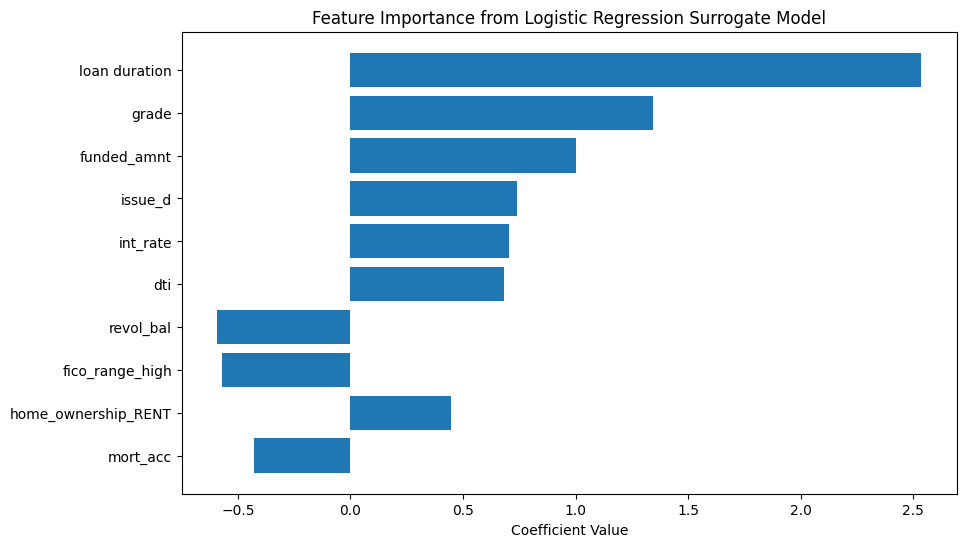

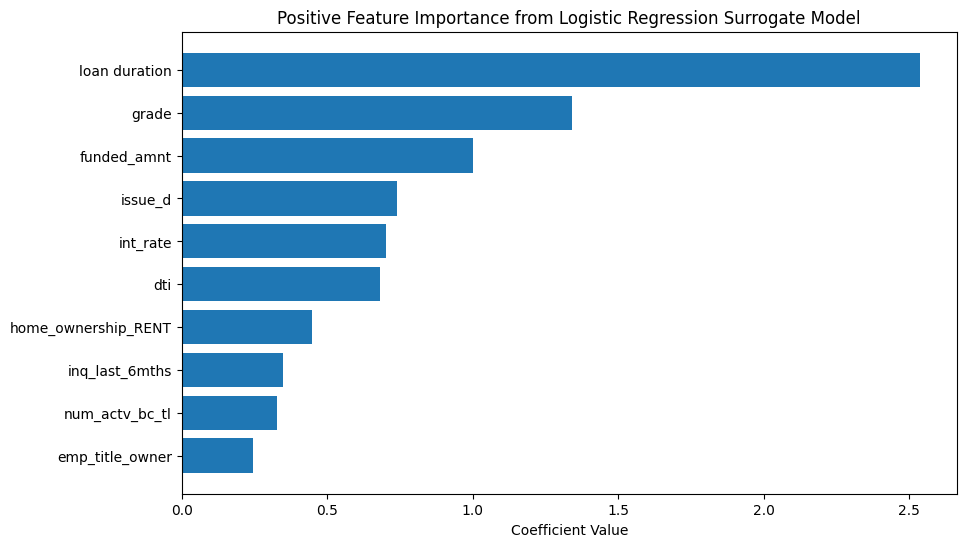

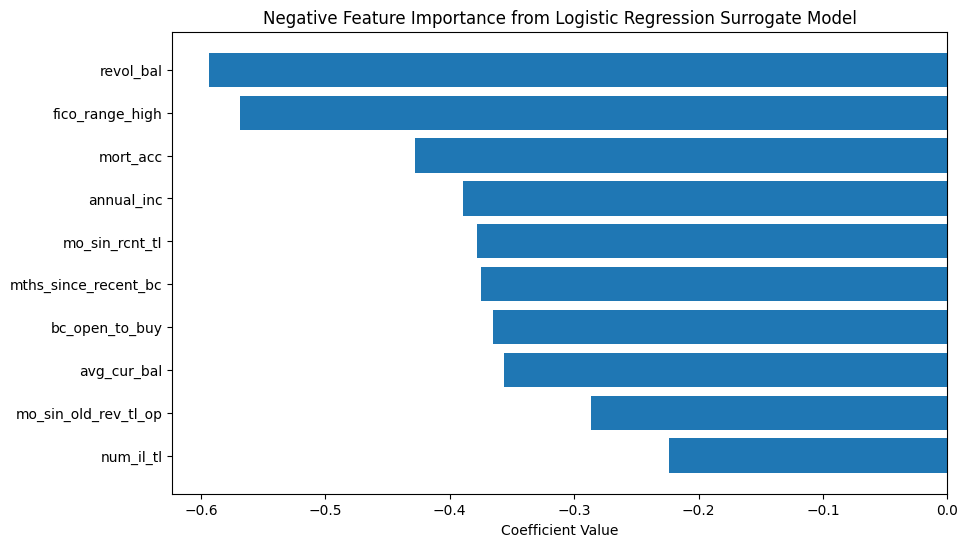

In [11]:
# plot most important features
surrogate.plot_interpretation(feature_names, max_features=10)